## Problem Statement
The company aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding Data
- reading data
- getting the dtypes, shape, null-values
- Data cleaning, formating

In [2]:
# get the data
filepath = r'D:\Niku_OneDrive\skill\upgrad\Executive_PGP_Machine_learning&AI\Machine_learning-1\linear_reg_assgn\day.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking for dtype, na values, shape 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking for mean & median values
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


The data is of 730*16 with no na values

## Data Cleaning

In [6]:
# chceking for missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Removing column which are not useful
# instant column is like index
# dteday column data is available in yr, mnth, workingday
# casual,registered, data is in cnt as cnt = casual + registered
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [8]:
# checking for unique values
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

season, mnth, weekday workingday, weathersit have less unique values converting them to categorical format according to the given data dictionary for better analysis.

In [9]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snow&rain',4:'Heavy_snow&rain'})

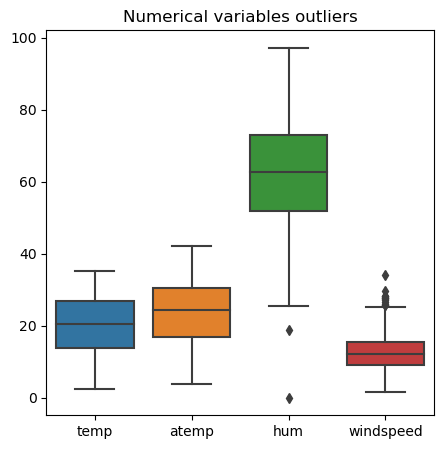

In [10]:
#check for outliers
plt.figure(figsize=(5,5))
plt.title('Numerical variables outliers')
data_to_plot= df[['temp','atemp','hum','windspeed']]
sns.boxplot(data=data_to_plot)
plt.show()

In [11]:
#checking for duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


No missing values, no outliers, no duplicates found, converted some columns to categorical data for better understanding

## Step 2 :Visualizing Data

Plotting some graphs for better understanding of data and their relationship

In [13]:
#visualize numerical data hum,temp,atemp and windspeed.
def single_var(col):
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(10,5))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Boxen Plot")
        sns.boxenplot(data =df, x=col,ax=ax[1])
        plt.show()

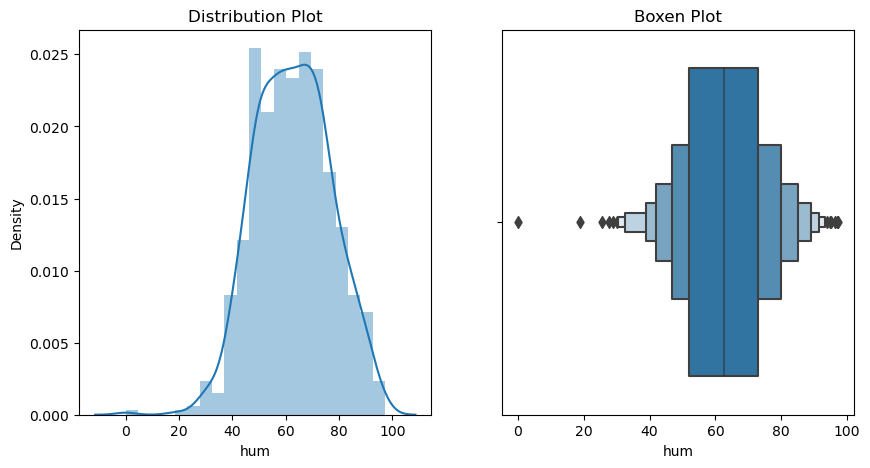

In [14]:
# humidity
single_var(col="hum")

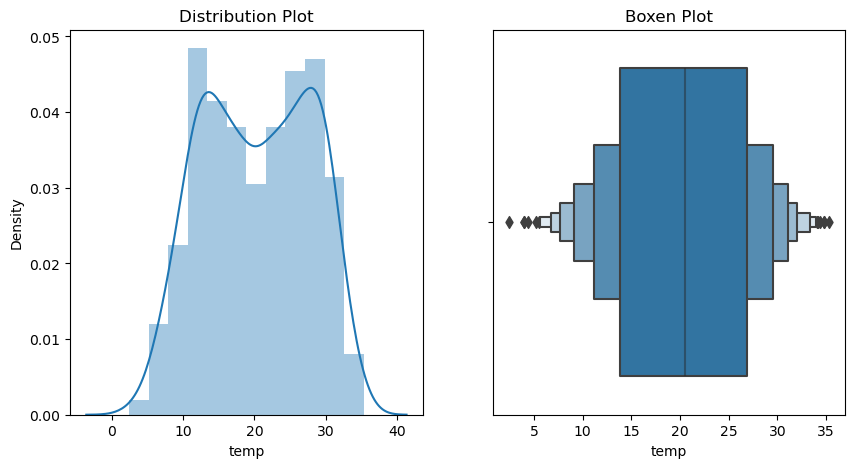

In [15]:
# temp
single_var('temp')

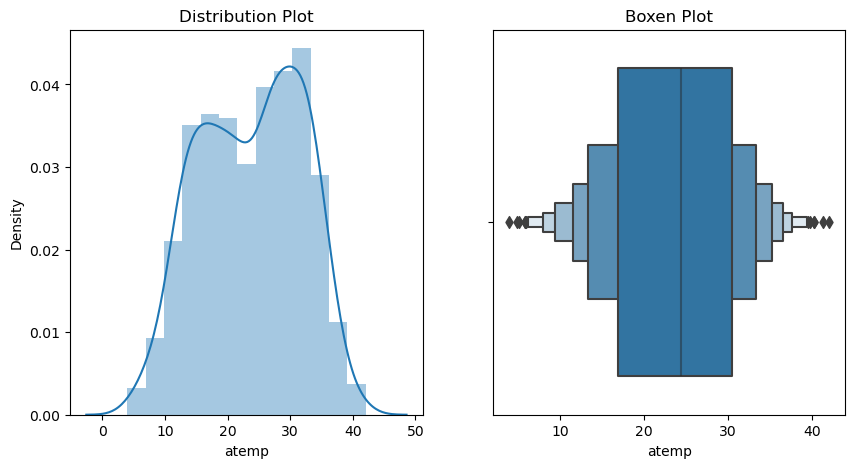

In [16]:
# atemp 
single_var('atemp')

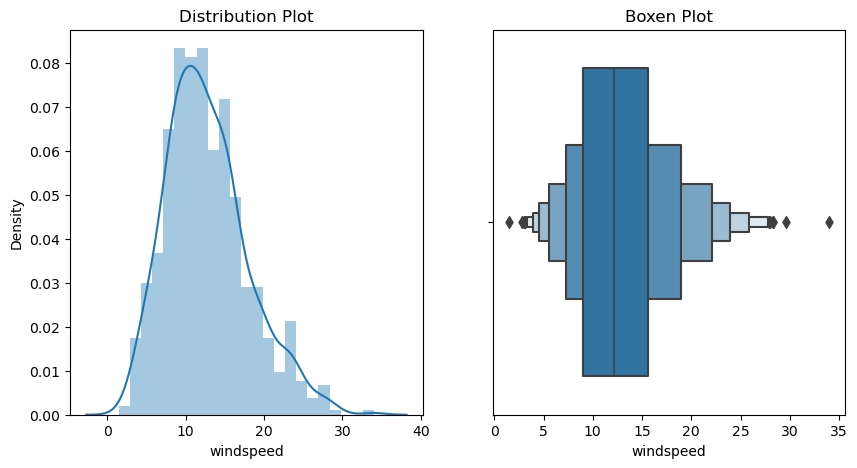

In [17]:
# windspeed
single_var('windspeed')

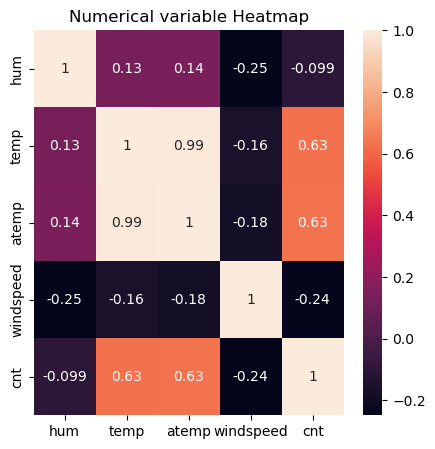

In [18]:
# Heatmap of correlation matrix of numerical data
plt.figure(figsize=(5,5))
plt.title('Numerical variable Heatmap')
numeric_data = df[['hum','temp', 'atemp', 'windspeed', 'cnt']]
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

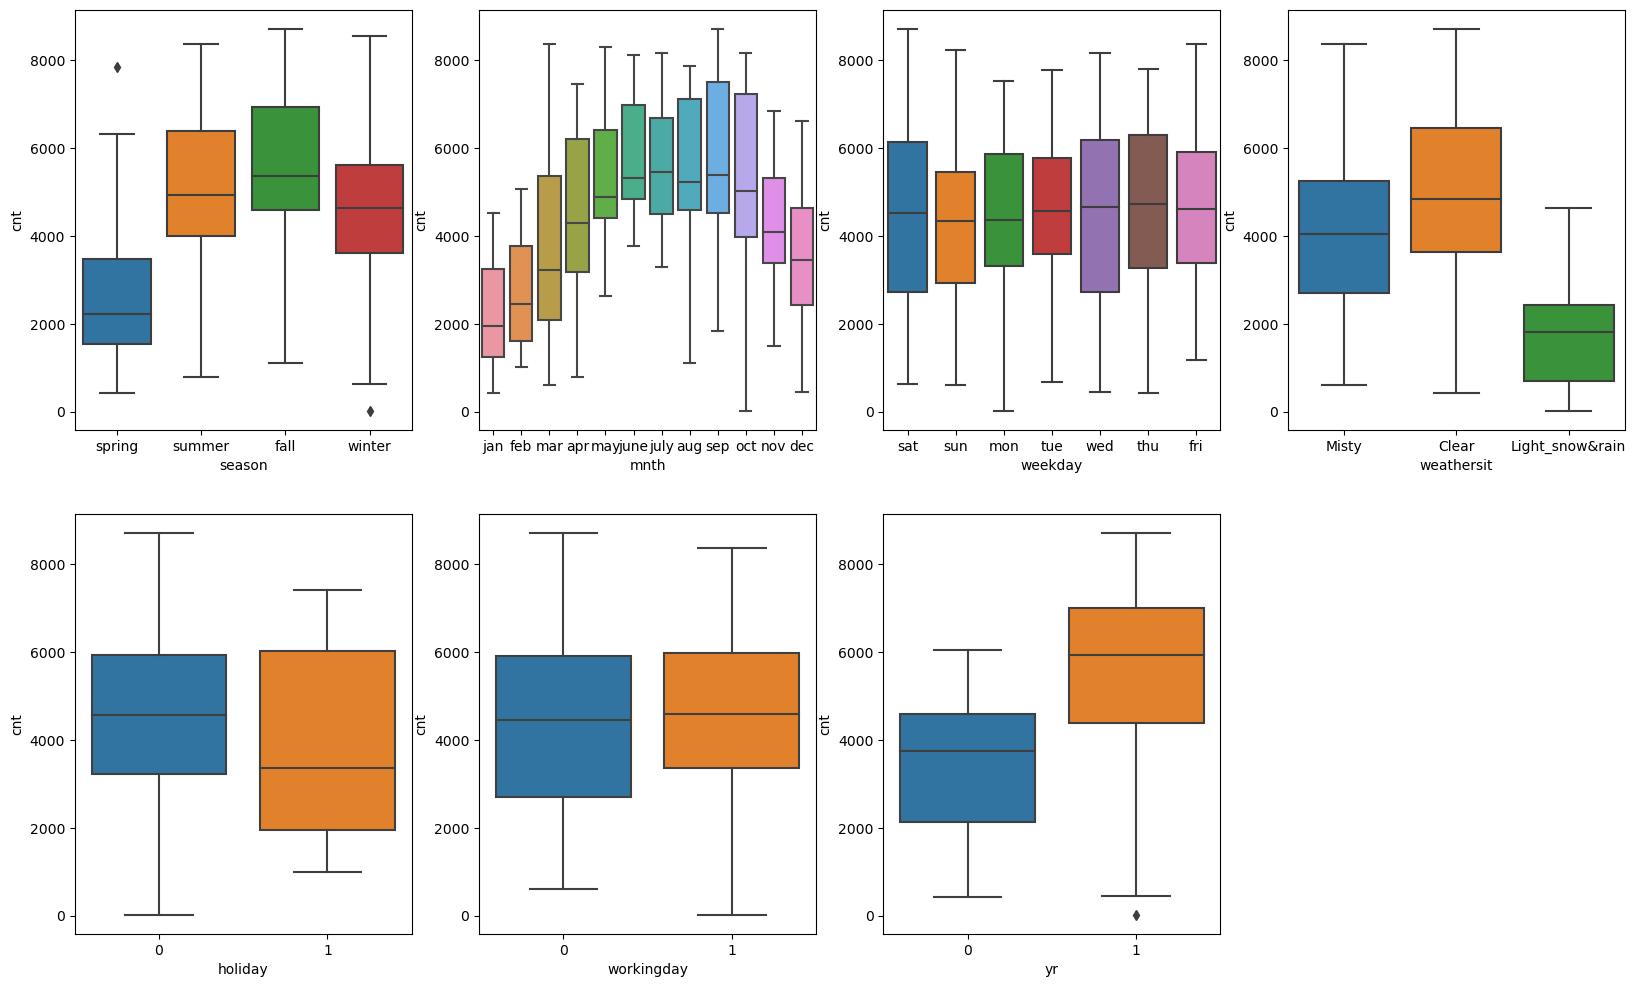

In [19]:
# visualizng categorical data wrt target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

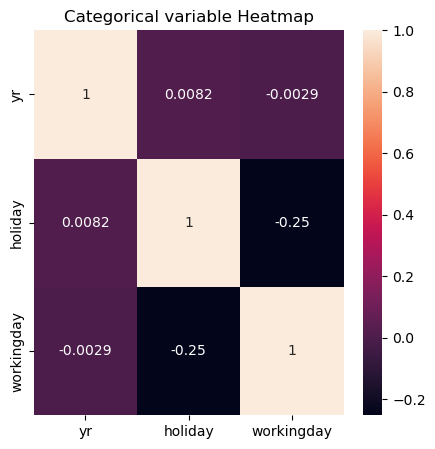

In [20]:
# Heatmap of correlation matrix of categorical data
plt.figure(figsize=(5,5))
plt.title('Categorical variable Heatmap')
categorical_data = df[['yr', 'holiday', 'workingday']]
sns.heatmap(categorical_data.corr(), annot=True)
plt.show()

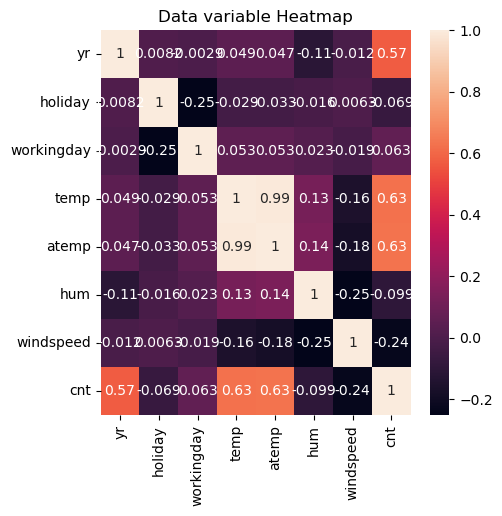

In [21]:
# heatmap of complete dataset correlation matrix
plt.figure(figsize=(5,5))
plt.title('Data variable Heatmap')
sns.heatmap(df.corr(), annot=True)
plt.show()

<Figure size 2000x1500 with 0 Axes>

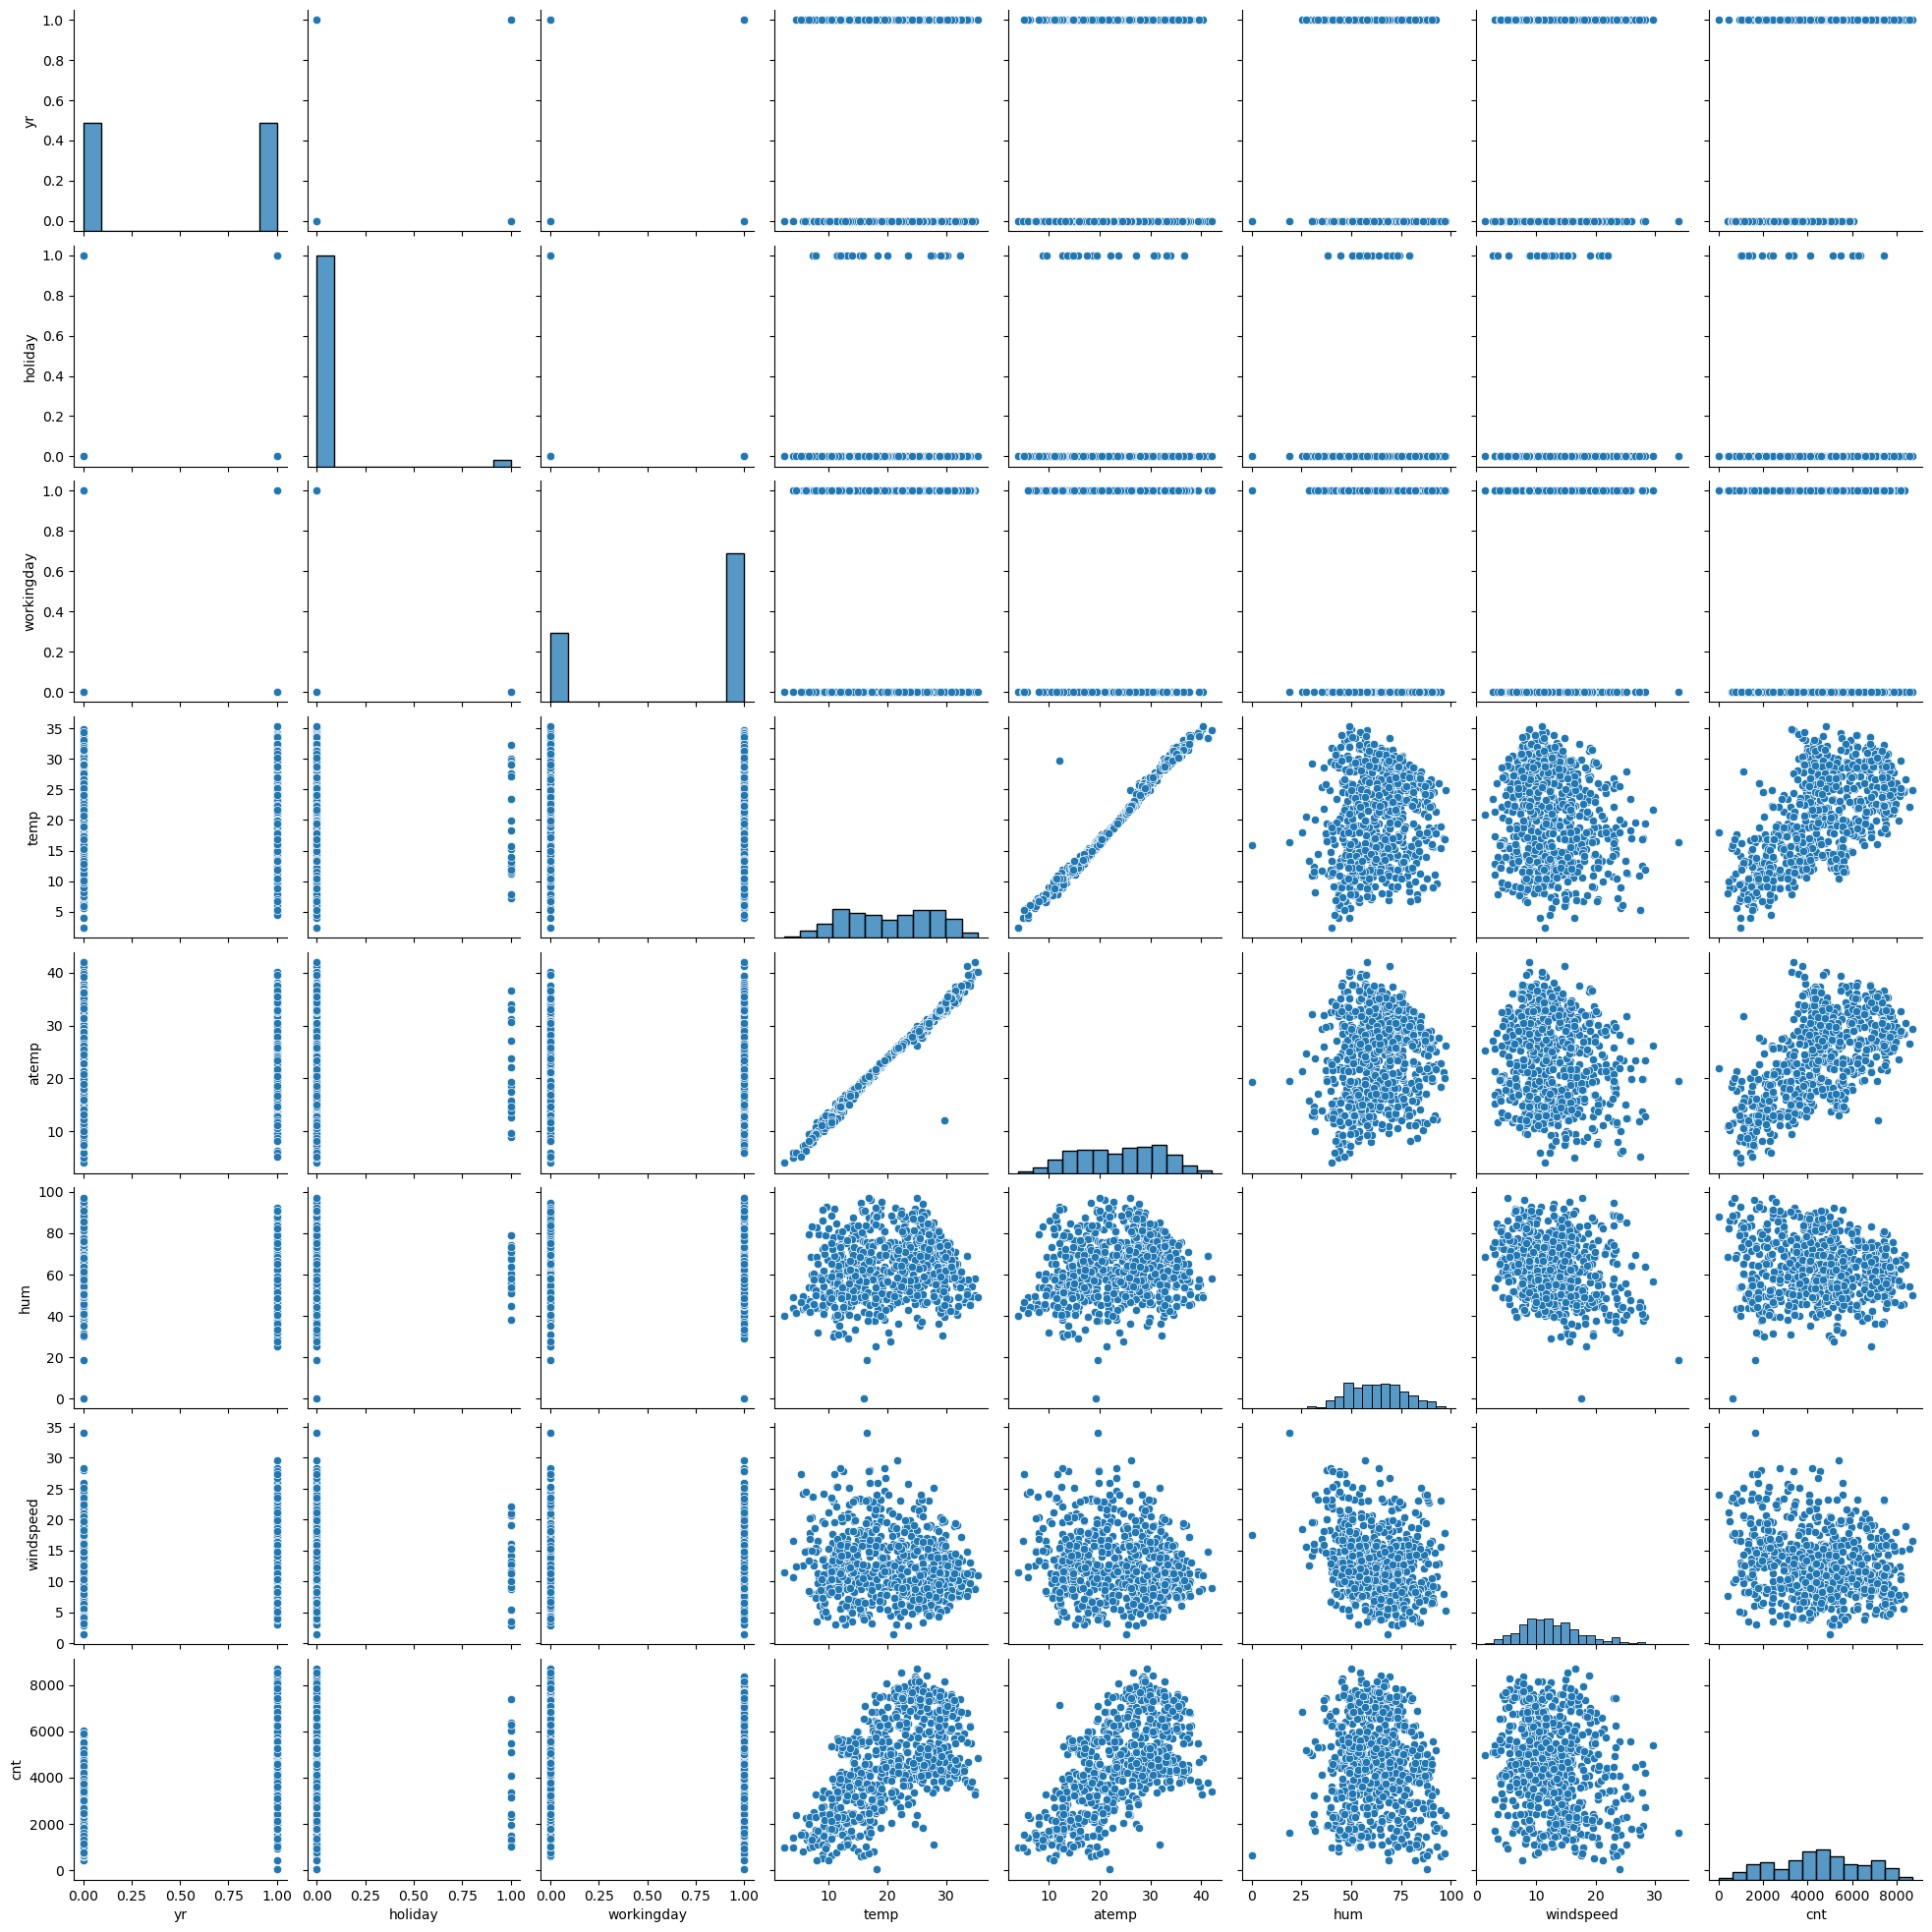

In [22]:
# plotting relation between input variables with target variable
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

It is observed that 'atemp' and 'temp' are highly corelated with each other

In [23]:
# dropping 'atemp'
df.drop('atemp', axis=1, inplace=True)

## Step 3: Preparing data for modelling
- Encoding: 
    - other categorical variable to dummy variable
- Spitting into train and test
 

Encoding catergorical variable to dummy variable

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 68.4+ KB


In [25]:
# getting only object data types
df_dummy = df.select_dtypes(include=['object'])

In [26]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday",'weathersit'],drop_first=True)

In [27]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snow&rain',
       'weathersit_Misty'],
      dtype='object')

In [28]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow&rain,weathersit_Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Spitting data into train and test

In [29]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [30]:
# 1. instantiate an object 
scaler = MinMaxScaler()

# create a list of numeric vars
df_num = ['temp','hum','windspeed','cnt']

# 2. fit the object
# scaler.fit
df_train[df_num] = scaler.fit_transform(df_train[df_num])

In [31]:
df_train[df_num].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [32]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow&rain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Training the MODEL

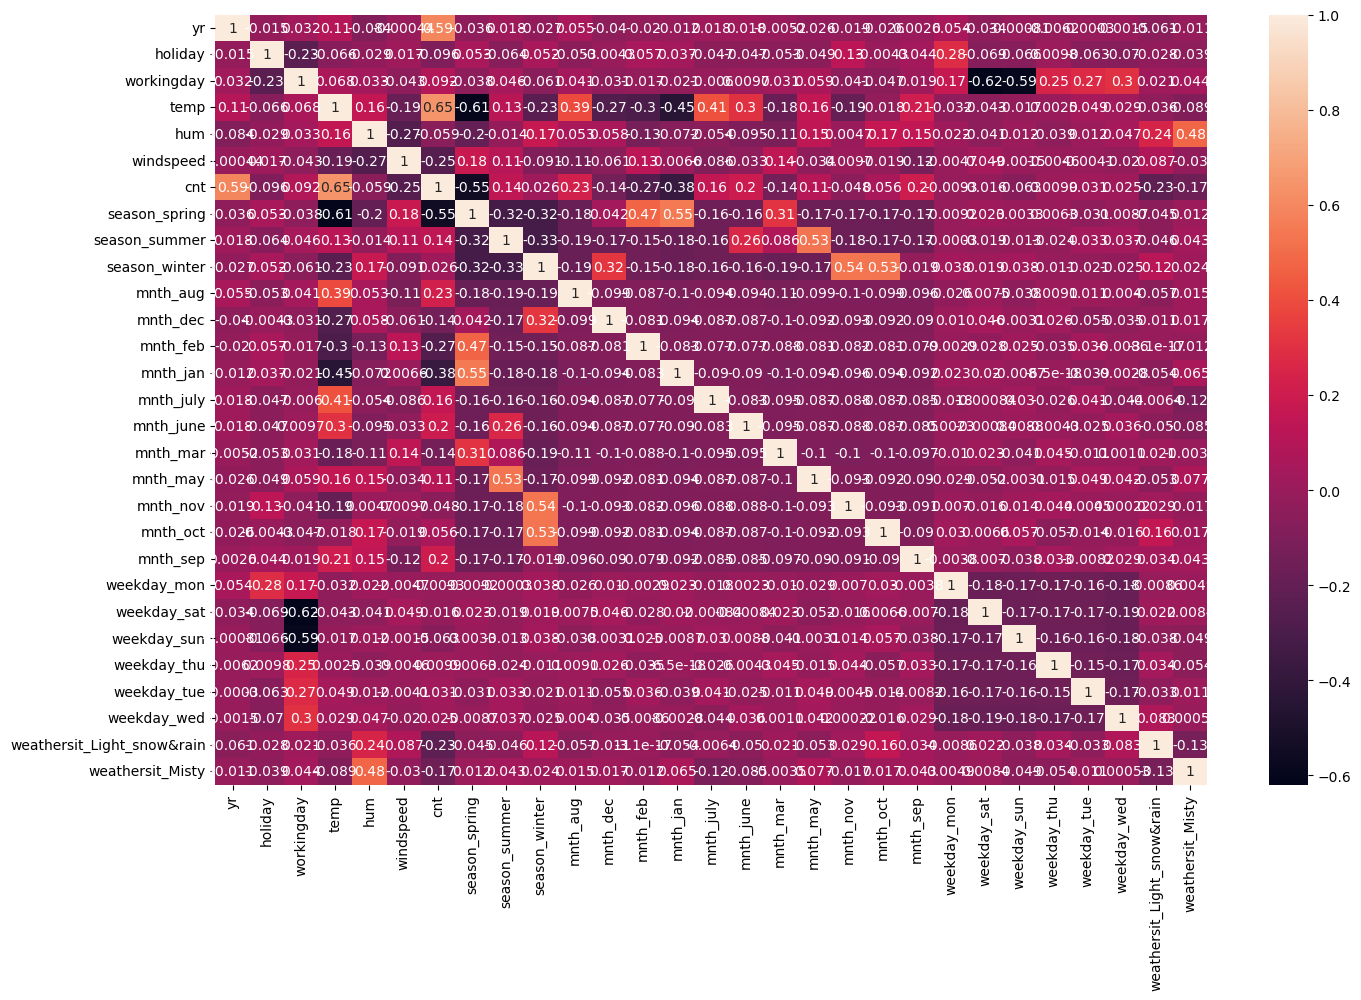

In [33]:
# Heatmap for complete trainng dataset
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [34]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

## Building Linear Model
- Building Linear Regression Model with SckitLearn for its compatibility with RFE
- Building with Stats.model


In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [37]:
#Columnscompatible with RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_Light_snow&rain', True, 1),
 ('weathersit_Misty', True, 1)]

In [38]:
# Selecting columns supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_july', 'mnth_sep', 'weekday_sat', 'weathersit_Light_snow&rain',
       'weathersit_Misty'],
      dtype='object')

In [39]:
# rejected columns
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_june', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [40]:
# Function to calculate VIF of variables
def cal_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [41]:
# getting selected variables 
X_train_rfe = X_train[col]

In [42]:
#linear model 1
X_train_1 = sm.add_constant(X_train_rfe)
lm_1= sm.OLS(y_train,X_train_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.22e-191
Time:                        15:46:05   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [43]:
#calculate_vif 
cal_VIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_Misty,2.29
0,yr,2.09
12,weekday_sat,1.98


In [44]:
# removing high p-value and low vif value first
# dropping 'mnth_jan'
X_train_new = X_train_1.drop('mnth_jan', axis=1)

In [45]:
#linear model 2
X_train_2 = sm.add_constant(X_train_new)
lm_2= sm.OLS(y_train,X_train_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.11e-191
Time:                        15:46:05   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [46]:
# calculate vif
cal_VIF(X_train_new)

,Features,VIF
0,const,82.35
7,season_spring,5.02
4,temp,3.62
9,season_winter,3.49
8,season_summer,2.62
5,hum,1.91
3,workingday,1.88
12,weekday_sat,1.78
14,weathersit_Misty,1.57
10,mnth_july,1.49


In [47]:
# dropping holiday due to  high p-value
X_train_new = X_train_2.drop('holiday', axis=1)

In [48]:
#linear model 3
X_train_3 = sm.add_constant(X_train_new)
lm_3= sm.OLS(y_train,X_train_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.54e-191
Time:                        15:46:06   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [49]:
# calculate vif
cal_VIF(X_train_new)

,Features,VIF
0,const,81.14
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.48
7,season_summer,2.62
4,hum,1.91
2,workingday,1.65
11,weekday_sat,1.64
13,weathersit_Misty,1.57
9,mnth_july,1.49


In [50]:
# dropping 'season_spring' because high of p-value
X_train_new = X_train_3.drop('season_spring', axis=1)

In [51]:
#linear model 4
X_train_4 = sm.add_constant(X_train_new)
lm_4= sm.OLS(y_train,X_train_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.14e-191
Time:                        15:46:06   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [52]:
# calculate vif
cal_VIF(X_train_new)

,Features,VIF
0,const,51.11
4,hum,1.88
2,workingday,1.65
10,weekday_sat,1.64
3,temp,1.60
12,weathersit_Misty,1.56
8,mnth_july,1.43
6,season_summer,1.33
7,season_winter,1.29
11,weathersit_Light_snow&rain,1.24


In [53]:
# dropping 'mnth_july' because high of p-value
X_train_new = X_train_4.drop('mnth_july', axis=1)

In [54]:
#linear model 5
X_train_5 = sm.add_constant(X_train_new)
lm_5= sm.OLS(y_train,X_train_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          5.10e-191
Time:                        15:46:07   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [55]:
#calculate_vif
cal_VIF(X_train_5)

,Features,VIF
0,const,51.11
4,hum,1.87
2,workingday,1.65
9,weekday_sat,1.64
11,weathersit_Misty,1.56
3,temp,1.27
7,season_winter,1.25
10,weathersit_Light_snow&rain,1.24
6,season_summer,1.19
5,windspeed,1.18


In [56]:
# dropping 'const' due to high vif value
X_train_new = X_train_5.drop('const', axis=1)

In [57]:
#linear model 6
X_train_6 = sm.add_constant(X_train_new)
lm_6= sm.OLS(y_train,X_train_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          5.10e-191
Time:                        15:46:07   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

1. Dropping column with the following pattern
    1. high vif, high p value
    2. high p low vif
    3. high vif
    here we are npt having any high vif and high p-value case
2. In linear model 5 & 6 , the value of R square, adjusted R square, F statistics are same, this means high vif value of const has no effect on linear model
3. Linear Regression model 6 to be final model

## Step 6: Residual Analysis of the train data

In [58]:
y_train_pred = lm_6.predict(X_train_6)

In [59]:
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

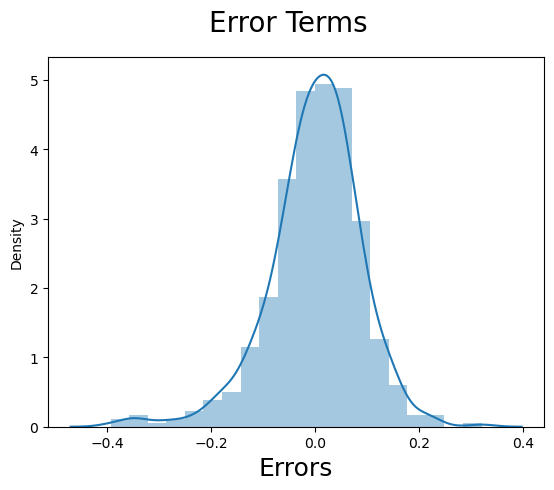

In [60]:
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

## Step 7 :Making prediction and evaluation of the test set
- Model Evaluation
- Summary

In [61]:
# Applying scaling on the test data

# create a list of numeric vars
df_num= ['temp','hum','windspeed','cnt']

# 2. fit the object
# scaler.fit
df_test[df_num] = scaler.fit_transform(df_test[df_num])

In [62]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow&rain,weathersit_Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.508362,0.418803,0.517923,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.248645,0.200875,0.187683,0.239498,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.650989,0.523975,0.687956,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [65]:
y_pred = lm_6.predict(X_test_lm_6)

In [66]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.806

## Model Evaluation

Text(0, 0.5, 'y_pred')

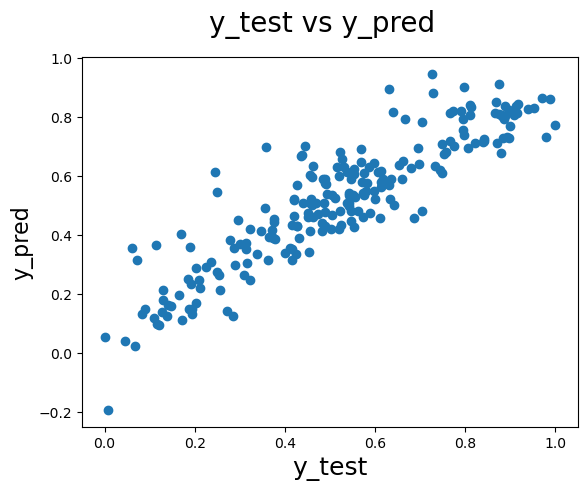

In [67]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [68]:
round(lm_6.params,4)

const                         0.1705
yr                            0.2294
workingday                    0.0533
temp                          0.5710
hum                          -0.1629
windspeed                    -0.1864
season_summer                 0.0910
season_winter                 0.1396
mnth_sep                      0.1027
weekday_sat                   0.0628
weathersit_Light_snow&rain   -0.2426
weathersit_Misty             -0.0538
dtype: float64

In [69]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),3)
print(adjusted_r2)

0.796


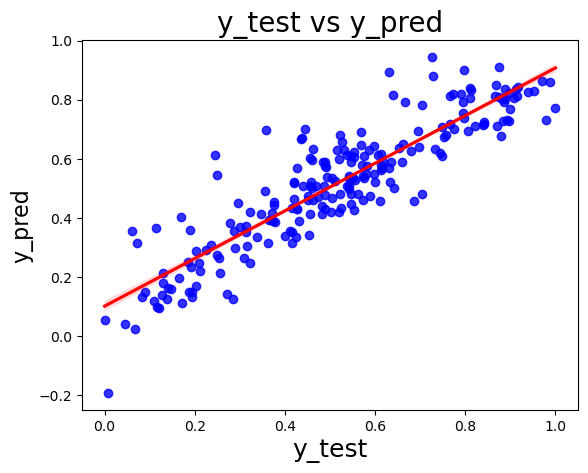

In [70]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Conclusion
- Comparing Training & Test dataset
    - Train dataset R sqr          : 0.841
    - Test dataset R sqr           : 0.806
    - Train dataset adjusted R sqr : 0.838
    - Test dataset adjusted R sqr  : 0.796
- Factors which bike sharing data is dependant on temperature, year, winter season, september month, summer season, saturday, workingday misty weather, humdity, windspeed, light snow & rain